The following code is written to train and test the Keras Model to classify Cats and Dogs on Google Colab.


Import Tensorflow and Check its Version

In [1]:
import os
import tensorflow as tf
#!pip install tensorflow --upgrade
print(tf.__version__)

2.4.1


Download datasets of Cats and Dogs for training and testing from Url.


In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
PATH_TO_ZIP = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(PATH_TO_ZIP),'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [3]:
print(os.listdir(PATH))

['validation', 'vectorize.py', 'train']


Path to Training and Validation Directories


In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
print(os.listdir(train_dir))

['cats', 'dogs']


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
batch_size = 32

In [7]:
print('train_cats',len(os.listdir(train_cats_dir)))
print('train_dogs',len(os.listdir(train_dogs_dir)))
print('validation_cats',len(os.listdir(validation_cats_dir)))
print('validation_dogs',len(os.listdir(validation_dogs_dir)))

train_cats 1000
train_dogs 1000
validation_cats 500
validation_dogs 500


Define Keras Model


In [8]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Compile Keras Model 


In [9]:
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

Generate Training and Testing Data Generators

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 45,
                                   height_shift_range = 0.2,
                                   width_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.5,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     batch_size = batch_size,
                                                     class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                    target_size= (150,150),
                                    batch_size = batch_size,
                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Display Five images from Training Generator

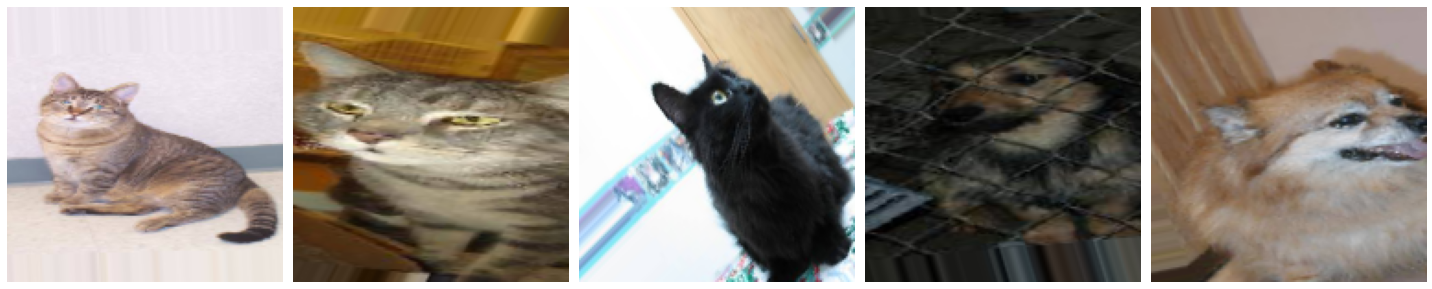

In [12]:
import matplotlib.pyplot as plt
sample_training_images, _ = next(train_generator)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


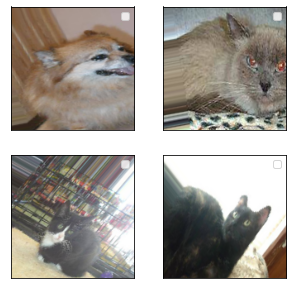

In [13]:
img = sample_training_images[4:]
plt.figure(figsize=(5,5))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[i], cmap=plt.cm.binary)
  plt.legend()
plt.show()

Train Model

In [14]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 100,
                              epochs = 15,
                              validation_data = validation_generator,
                              validation_steps = 50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 50s 172ms/step - loss: 0.6968 - acc: 0.5115 - val_loss: 0.6890 - val_acc: 0.5540


Plot its Training and Validation Acuracy as well as loss.

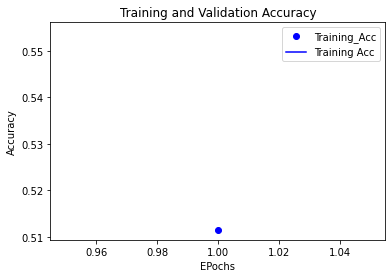

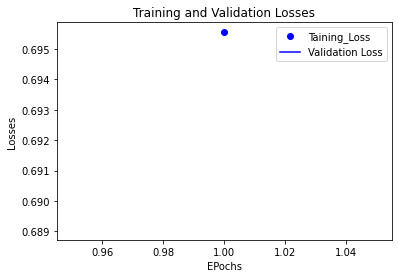

In [15]:
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training_Acc')
plt.plot(epochs,val_acc, 'b', label='Training Acc')
plt.xlabel('EPochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.xlabel('EPochs')
plt.ylabel('Losses')
plt.plot(epochs,loss,'bo',label='Taining_Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

Thanks 

VIPUL KAMBOJ